In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np  
   

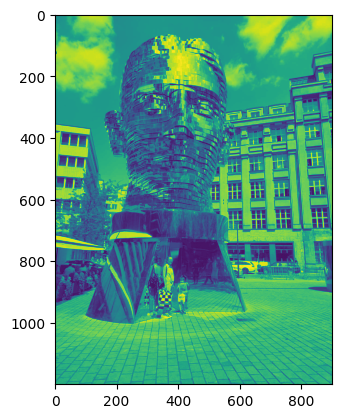

In [2]:
img = cv2.imread('kafka.jpg', cv2.IMREAD_GRAYSCALE)
 
plt.imshow(img)
plt.show() 

In [3]:
# Apply Gaussian blur to remove noise
img_blur = cv2.GaussianBlur(img, (3, 3), 0) 
   

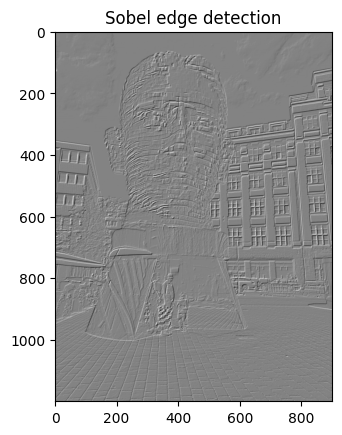

In [4]:
# Apply Sobel edge detection in the x and y directions
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

# Combine the two gradients to produce an edge map
sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0) 
 
plt.imshow(sobel, cmap='gray')
plt.title('Sobel edge detection')
plt.show() 

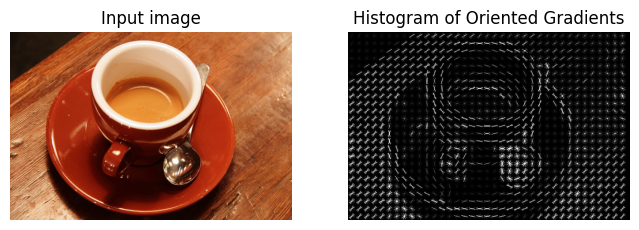

In [5]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.coffee()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage.color import rgb2gray

import joblib
from joblib import dump, load
import numpy as np
from keras.datasets import cifar10
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [7]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
def extract_features(data):
    data_gray = [rgb2gray(instance) for instance in data]
    data_hog = [hog(instance, cells_per_block=(2, 2)) for instance in data_gray]
    return np.array(data_hog)

In [9]:
y_train = y_train.flatten() # вирівнювання розмірності даних
y_test = y_test.flatten() 

print('Видобуток ознак за допомогою HOG')


Видобуток ознак за допомогою HOG


In [10]:
X_train_features=extract_features(X_train)
X_test_features=extract_features(X_test)

In [11]:
#clf = MLPClassifier(learning_rate_init=0.5, hidden_layer_sizes=(1000,)) - 900, 800, 700....to long processing....... 
clf = MLPClassifier(learning_rate_init=0.5, hidden_layer_sizes=(500,)) 

In [12]:
clf.fit(X_train_features, y_train)

MLPClassifier(hidden_layer_sizes=(500,), learning_rate_init=0.5)

In [13]:
y_pred = clf.predict(X_test_features)

In [14]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\38098\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\38098\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\38098\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import numpy as np
import cv2 as cv
img = cv.imread('stone.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

True

In [26]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

True

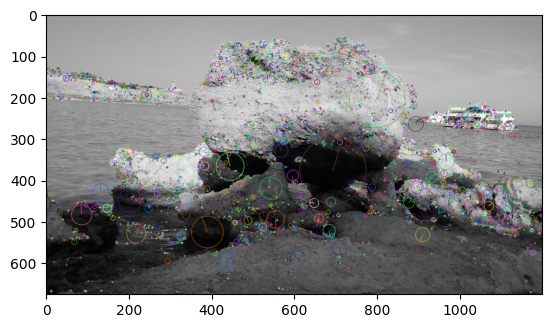

In [27]:
plt.imshow(img)